# Class 2 - Classifiers evaluation

### Import needed modules

In [ ]:
#!pip install numpy pandas matplotlib scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
plt.rcParams['figure.dpi'] = 120.0  #size of figures

In [3]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## 1. Imbalanced data and cost-based performance

**Data loading & pre-processing**

In [4]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
DATA_SET = pd.read_fwf(url, header=None)
DATA_SET.rename(columns={24: "target"}, inplace=True)
DATA_SET['target'] = DATA_SET['target'] - 1  #recoding target variable
DATA_SET

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,0
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,1
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,0
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,0
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,0
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,0
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,0
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,1


In [5]:
X = DATA_SET.drop(['target'], axis=1)
y = DATA_SET['target']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

In [6]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(700, 24) (300, 24)
(700,) (300,)


Is random sampling the best approach? What if one class has many more records than the other?
Imbalanced data may lead to poor model which may have good overall performance metrics e.g. accuracy.

There are several approaches to tackle the issue:
- undersampling, 
- oversampling, 
- **cost-based analysis**,
- algorithmic approches e.g. SMOTE

Check [imbalanced-learn](https://imbalanced-learn.org/stable/user_guide.html#user-guide) documentation for details.

**Building logistic regression model**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png" align="left">

https://en.wikipedia.org/wiki/Logistic_regression

[Logistic regression in scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [7]:
model = LogisticRegression(penalty=None, max_iter=1000)
LR_L1 = model.fit(X_train, y_train)

In [8]:
print(LR_L1.coef_)

[[-0.51044538  0.03739456 -0.54565743  0.00582444 -0.22664084 -0.14629089
  -0.23680619  0.08670278  0.15818728 -0.01682135 -0.26753016  0.40986635
   0.11236149 -0.40058993 -1.14148252  0.70081252 -1.15848349  1.04117101
   1.62508578  0.37360848 -0.05432323 -1.16939519  0.0316564  -0.18236198]]


**Predict probability of bad credit**

In [9]:
print(LR_L1.predict_proba(X_test))

[[0.38160693 0.61839307]
 [0.06134622 0.93865378]
 [0.66992778 0.33007222]
 [0.44589149 0.55410851]
 [0.14587705 0.85412295]
 [0.51601255 0.48398745]
 [0.44020444 0.55979556]
 [0.86341367 0.13658633]
 [0.9371325  0.0628675 ]
 [0.83115197 0.16884803]
 [0.21490475 0.78509525]
 [0.37856667 0.62143333]
 [0.84768489 0.15231511]
 [0.9362607  0.0637393 ]
 [0.58029842 0.41970158]
 [0.65514651 0.34485349]
 [0.977582   0.022418  ]
 [0.92643621 0.07356379]
 [0.9147503  0.0852497 ]
 [0.22852488 0.77147512]
 [0.85109456 0.14890544]
 [0.38517859 0.61482141]
 [0.80327631 0.19672369]
 [0.8882838  0.1117162 ]
 [0.91921226 0.08078774]
 [0.83420313 0.16579687]
 [0.86088358 0.13911642]
 [0.8252742  0.1747258 ]
 [0.87193273 0.12806727]
 [0.07435862 0.92564138]
 [0.72654138 0.27345862]
 [0.9475073  0.0524927 ]
 [0.64490721 0.35509279]
 [0.77019266 0.22980734]
 [0.83064548 0.16935452]
 [0.21191393 0.78808607]
 [0.70398306 0.29601694]
 [0.48518625 0.51481375]
 [0.84843946 0.15156054]
 [0.91848335 0.08151665]


In [10]:
print(LR_L1.predict_proba(X_test)[:,1])

[0.61839307 0.93865378 0.33007222 0.55410851 0.85412295 0.48398745
 0.55979556 0.13658633 0.0628675  0.16884803 0.78509525 0.62143333
 0.15231511 0.0637393  0.41970158 0.34485349 0.022418   0.07356379
 0.0852497  0.77147512 0.14890544 0.61482141 0.19672369 0.1117162
 0.08078774 0.16579687 0.13911642 0.1747258  0.12806727 0.92564138
 0.27345862 0.0524927  0.35509279 0.22980734 0.16935452 0.78808607
 0.29601694 0.51481375 0.15156054 0.08151665 0.14721363 0.32059271
 0.01876627 0.64125644 0.10434713 0.03660299 0.09772617 0.20810802
 0.04735929 0.14384485 0.25529922 0.26403754 0.68044579 0.52646651
 0.24391873 0.08892847 0.3921892  0.76865621 0.07986582 0.49267647
 0.31763329 0.06668929 0.50258823 0.05535444 0.63881121 0.24012357
 0.15315185 0.05535479 0.83109684 0.92451867 0.24895397 0.1979596
 0.06273677 0.23350123 0.13611332 0.15329005 0.87262186 0.04994198
 0.0641578  0.19384259 0.40819009 0.0335434  0.01217862 0.04380532
 0.46386239 0.473077   0.13370146 0.24698939 0.56543599 0.034040

In [11]:
#On validation data
score_val = LR_L1.predict_proba(X_test)[:, 1]
#On training data
score_train = LR_L1.predict_proba(X_train)[:, 1]

In [12]:
print(score_train)

[0.69673946 0.02900506 0.26203183 0.26489849 0.61627431 0.24231028
 0.76472598 0.45696676 0.01996984 0.07979661 0.07631305 0.31760663
 0.29104626 0.04144594 0.03398511 0.09648187 0.40278745 0.15188486
 0.16288555 0.06839248 0.41892136 0.03914255 0.56965375 0.0170734
 0.02419408 0.06777917 0.3375075  0.27600637 0.2541525  0.56830572
 0.54526134 0.14268472 0.16396426 0.25256995 0.22442459 0.51227866
 0.0855772  0.68741745 0.17058769 0.03103112 0.51664331 0.57419678
 0.08085997 0.14326369 0.24477462 0.3084074  0.15327706 0.24569722
 0.15577093 0.15979706 0.03574168 0.13389187 0.04566005 0.57888335
 0.73582561 0.64225937 0.08316158 0.38371344 0.0706837  0.03571639
 0.44249922 0.3092654  0.04462086 0.3050831  0.03292229 0.22289891
 0.6741007  0.35259104 0.22019648 0.29109765 0.31679791 0.12321911
 0.237996   0.17564952 0.96274218 0.4832135  0.29822089 0.60683734
 0.0244368  0.15649441 0.11174414 0.32777247 0.08916804 0.28850118
 0.20431678 0.7807745  0.79853075 0.28056618 0.80984453 0.04245

**Cost-based approach in model assessment**

In [14]:
def cutoff_analysis(
    y_test: pd.Series,
    y_test_hat: pd.Series,
    cost_matrix: np.array = np.array([[0, 0], [0, 0]])
) -> list:
    """
    Calculate accuracy vector for cutoff thresholds between 0 and 1 for given true labels `y_test` 
    and predicted labels `y_test_hat`. If `cost_matrix` is specified, calculates cost vector instead.
    """
    cutoff_range = np.arange(0, 1.0, 0.01)
    vec = []
    for cutoff in cutoff_range:
        y_test_hat_bin = np.where(y_test_hat >= cutoff, 1, 0)
        conf_mat = confusion_matrix(y_test, y_test_hat_bin)
        #no cost matrix, calculate accuracy
        if np.sum(cost_matrix) == 0:
            vec.append(np.sum(np.diag(conf_mat)) / np.sum(conf_mat))
        else:
            conf_const_mat = np.multiply(conf_mat, cost_matrix)
            vec.append(conf_const_mat.sum() / len(y_test))
    return vec

In [15]:
costmat = np.array([[0, 1], [5, 0]])
cost_val = cutoff_analysis(y_test, score_val, cost_matrix=costmat)
cost_train = cutoff_analysis(y_train, score_train, cost_matrix=costmat)
costmat

array([[0, 1],
       [5, 0]])

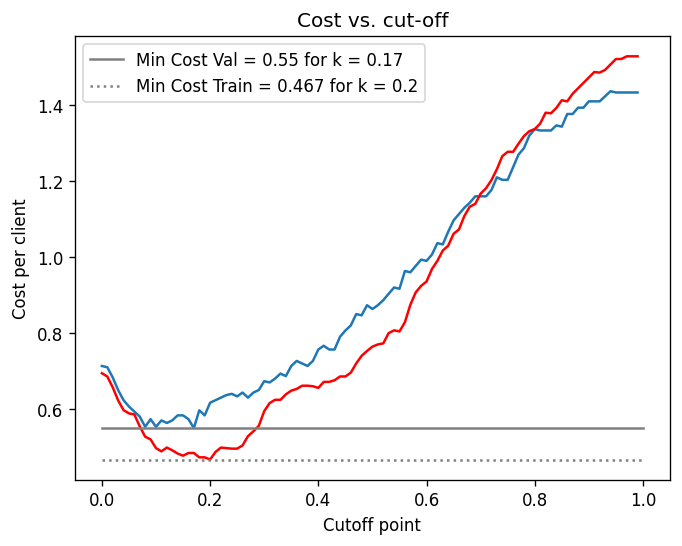

In [16]:
plt.figure()
plt.xlabel("Cutoff point")
plt.ylabel("Cost per client")
plt.title("Cost vs. cut-off")

plt.plot(np.arange(0, 1.0, 0.01), cost_val)
plt.plot(np.arange(0, 1.0, 0.01), cost_train, color="red")
plt.plot([0, 1], [min(cost_val), min(cost_val)], color = 'gray', label = "Min Cost Val = " + \
         str(round(min(cost_val),3)) + " for k = " + str(round(np.arange(0, 1.0, 0.01)[cost_val.index(min(cost_val))],2)))
plt.plot([0, 1], [min(cost_train), min(cost_train)], color = 'gray', linestyle = ":", label = "Min Cost Train = " + \
         str(round(min(cost_train),3)) + " for k = " + str(np.arange(0, 1.0, 0.01)[cost_train.index(min(cost_train))]))

plt.legend()

Looks like we got lower cost for predictions on training set - model may **overfit** slightly.


## 2. Assessing model performance

In [17]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"
dataset = pd.read_csv(url,
                      sep=" ",
                      header=None,
                      names=["V" + str(i) for i in range(0, 15)])
# dataset.columns = ["V" + str(i) for i in range(0,15)]
dataset.rename(columns={"V14": "class"}, inplace=True)

dataset['V3'] = np.where(dataset['V3'] == 1, 0, 1)
dataset['V11'] = np.where(dataset['V11'] == 1, 0, 1)
dataset['V13'] = np.log(dataset['V13'])
dataset

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,class
0,1,22.08,11.460,1,4,4,1.585,0,0,0,1,1,100,7.100852,0
1,0,22.67,7.000,1,8,4,0.165,0,0,0,0,1,160,0.000000,0
2,0,29.58,1.750,0,4,4,1.250,0,0,0,1,1,280,0.000000,0
3,0,21.67,11.500,0,5,3,0.000,1,1,11,1,1,0,0.000000,1
4,1,20.17,8.170,1,6,4,1.960,1,1,14,0,1,60,5.068904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,1,14,4,6.500,1,0,0,0,1,0,0.000000,1
686,1,20.67,0.415,1,8,4,0.125,0,0,0,0,1,0,3.806662,0
687,0,18.83,9.540,1,6,4,0.085,1,0,0,0,1,100,0.000000,1
688,0,27.42,14.500,1,14,8,3.085,1,1,1,0,1,120,2.484907,1


**Data split using sklearn**

In [18]:
training_fraction = 0.8
X = dataset.iloc[:, 0:14]
y = dataset.iloc[:, 14]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=1-training_fraction,
                                                    random_state=42)

In [19]:
print(X_train.shape, y_train.shape)

(552, 14) (552,)


**Confusion matrix**

❗ Remember class indicator (0, 1,...) and actual or predicted values may be switched in confusion matrix

<img src="https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png" width=400>

<img src="https://miro.medium.com/max/1780/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg"  width=400>

**Performance measures derived from confusion matrix:**

- Accuracy - percentage of correct predictions

`ACC = (TP + TN)/(TP + FP + TN + FN)`

- Precision - percentage of positive predictions which were actually correct

`PREC = TP / (TP + FP)`

-  Recall - what percentage of actual positives were predicted correctly
 (Recall = Sensitivity = Hit rate = True Positive Rate (TPR))
 
`REC = TP / (TP + FN)`

- F1 Score - traditional F-measure or balanced F-score (F1 score) is the harmonic mean of precision and recall

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd)

In [20]:
lr = LogisticRegression

In [21]:
model2 = lr(penalty=None, max_iter=1000).fit(X_train, y_train)

In [22]:
y_test_hat = model2.predict(X_test)

In [23]:
confm = confusion_matrix(y_test, y_test_hat)
confm

array([[78,  9],
       [11, 40]])

In [19]:
#What is what in confusion matrix?
confusion_matrix?

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

In [24]:
ACC = (confm[0, 0] + confm[1, 1]) / np.sum(confm)
PREC = (confm[1, 1]) / (confm[1, 1] + confm[0, 1])
REC = (confm[1, 1]) / (confm[1, 1] + confm[1, 0])
F1 = 2 * PREC * REC / (PREC + REC)
print("ACC ", ACC, "\nPREC ", PREC, "\nREC ", REC, "\nF1 ", F1)

ACC  0.855072463768116 
PREC  0.8163265306122449 
REC  0.7843137254901961 
F1  0.8


In [21]:
?classification_report

Signature:
classification_report(
    y_true,
    y_pred,
    *,
    labels=None,
    target_names=None,
    sample_weight=None,
    digits=2,
    output_dict=False,
    zero_division='warn',
)
Docstring:
Build a text report showing the main classification metrics.

Read more in the :ref:`User Guide <classification_report>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) target values.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_labels,), default=None
    Optional list of label indices to include in the report.

target_names : array-like of shape (n_labels,), default=None
    Optional display names matching the labels (same order).

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

digits : int, default=2
    Number of digits for formatting output floating point values.
    When ``

In [25]:
#Sklearn built-in report
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        87
           1       0.82      0.78      0.80        51

    accuracy                           0.86       138
   macro avg       0.85      0.84      0.84       138
weighted avg       0.85      0.86      0.85       138



### Visual analysis of a model - ROC Curve

**ROC curve + AUC**

In [28]:
y_train_hat = model2.predict_proba(X_train)[:,1]
y_test_hat = model2.predict_proba(X_test)[:,1]

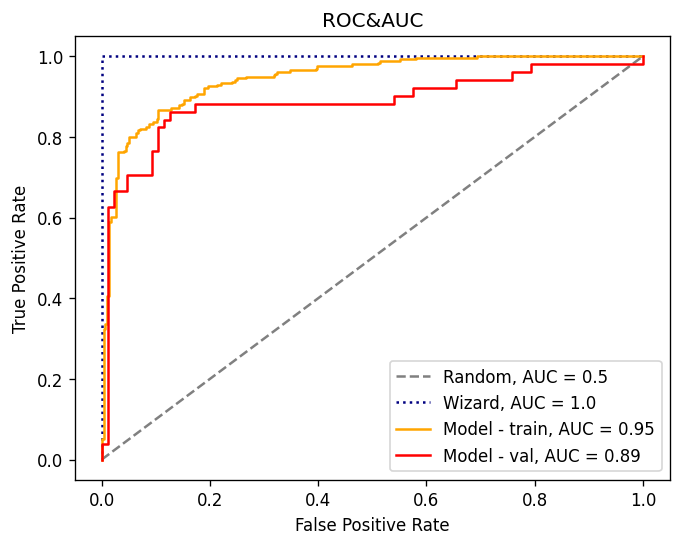

In [29]:
fprv, tprv, _ = roc_curve(y_test, y_test_hat)
fprt, tprt, _ = roc_curve(y_train, y_train_hat)
auc_rocv = auc(fprv, tprv)
auc_roct = auc(fprt, tprt)

plt.figure()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC&AUC")

plt.plot([0, 1], [0, 1],
         color='grey',
         linestyle='--',
         label="Random, AUC = 0.5")
plt.plot([0, 0], [0, 1],
         color='navy',
         linestyle=':',
         label="Wizard, AUC = 1.0")
plt.plot([0, 1], [1, 1], color='navy', linestyle=':')

plt.plot(fprt,
         tprt,
         color='orange',
         label='Model - train, AUC = %0.2f' % auc_roct)
plt.plot(fprv, tprv, color='red', label='Model - val, AUC = %0.2f' % auc_rocv)
plt.legend(loc="lower right")

## Exercises

Load Iris dataset from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv to 'iris' DataFrame

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

iris = pd.read_csv(url)

display(iris)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Code `species` column to have value 1 if iris is from _versicolor_ species and 0 otherwise

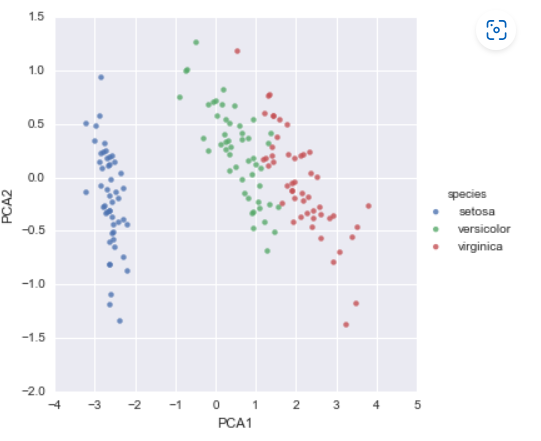

In [4]:
import numpy as np

# iris = iris[iris["species"] != "setosa"] # Second case when we exclude all the setosa base on PCA analysis
iris["species"] = np.where(iris["species"] == 'versicolor', 1, 0)

In [5]:
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [6]:
print(iris["species"].unique())

[1 0]


Your goal is to predict `species` column. Split dataset to train and validation subsets using `train_test_split` function. Training set should have **75%** of all observations.

In [7]:
from sklearn.model_selection import train_test_split

training_frac = 0.75
X = iris.iloc[:,0:4]
y = iris.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=training_frac,
                                                    random_state=42)

In [8]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(75, 4) (25, 4)
(75,) (25,)


Build logistic regression (with `LogisticRegression` from `sklearn`) using **Elastic-net** regularization with 0.35 L1 ratio (only one solver supports that, check [here](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression))

You can read more about **Elastic-net** [here](https://en.wikipedia.org/wiki/Elastic_net_regularization)

In [11]:
from sklearn.linear_model import LogisticRegression

lr_ex = LogisticRegression
model_ex = lr_ex(penalty='elasticnet', solver='saga', l1_ratio=0.35, max_iter=10000)

In [12]:
model_ex = model_ex.fit(X_train, y_train)

Make a prediction on test set with 0.5 cutoff thresholds. Produce classification report with `classification_report`. What is accuracy of the model?

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

y_test_hat = model_ex.predict(X_test)
print(confusion_matrix(y_test, y_test_hat))

[[11  0]
 [ 1 13]]


In [14]:
confm = confusion_matrix(y_test, y_test_hat)

ACC = (confm[0, 0] + confm[1, 1]) / np.sum(confm)
PREC = (confm[1, 1]) / (confm[1, 1] + confm[0, 1])
REC = (confm[1, 1]) / (confm[1, 1] + confm[1, 0])
F1 = 2 * PREC * REC / (PREC + REC)
print("ACC ", ACC, "\nPREC ", PREC, "\nREC ", REC, "\nF1 ", F1)

ACC  0.96 
PREC  1.0 
REC  0.9285714285714286 
F1  0.962962962962963


In [15]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.96        14

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



Accuracy is **0.76** on test data, but when we apply some PCA analysis --> we can remove the setosa group and rerun the model again, after that, the accuracy increase to **0.96**

Why accuracy is so low? If you want to know check [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Unsupervised-learning-example:-Iris-dimensionality) below `In[19]`.